# loading the libraries

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array,array_to_img


# data genrator class

In [4]:
# construct a data genrator class
data_gen=ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.5 , 0.5],
    horizontal_flip=True,
    fill_mode='nearest'
)

Found 4316 images belonging to 2 classes.


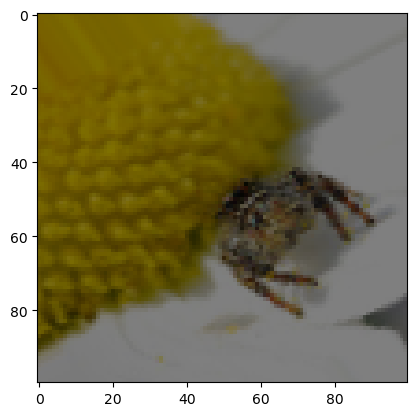

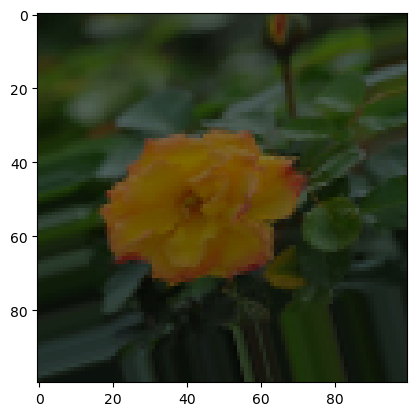

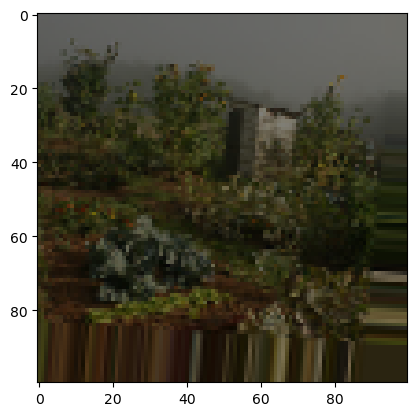

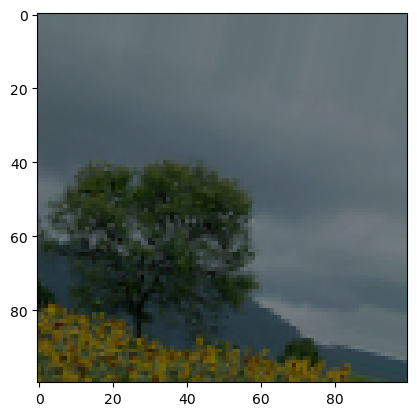

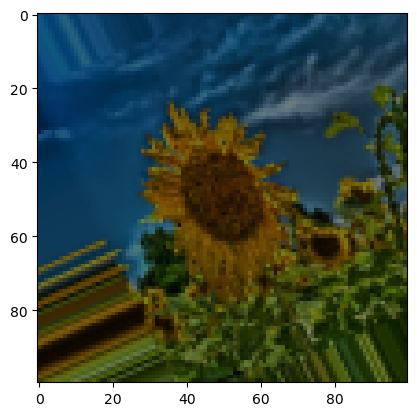

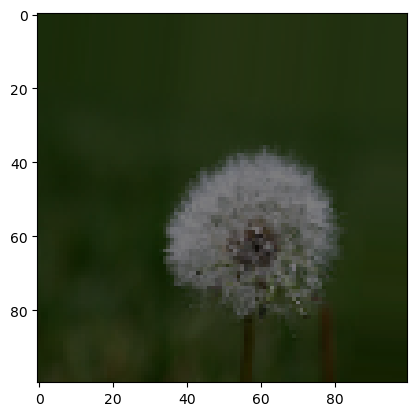

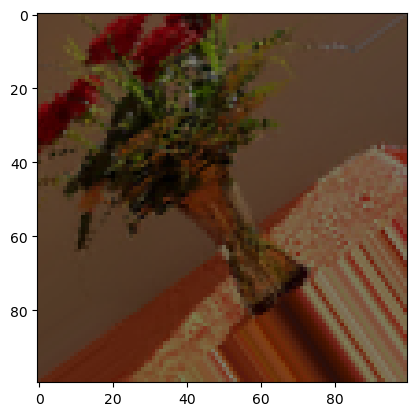

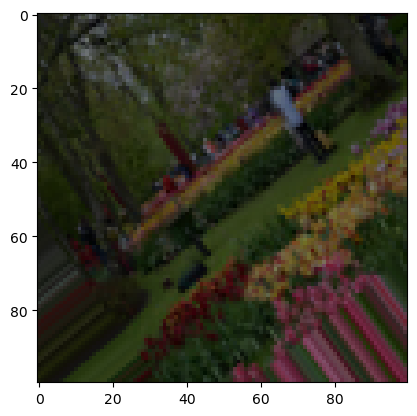

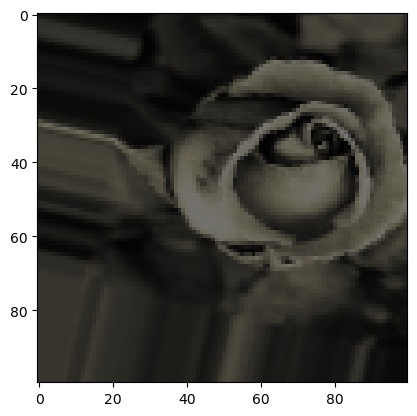

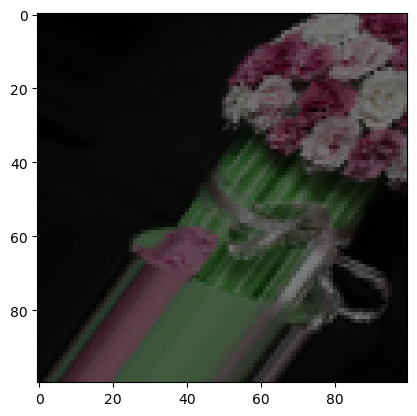

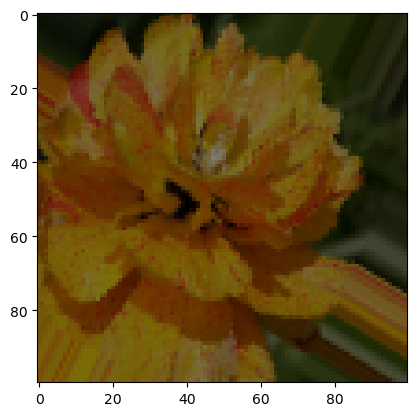

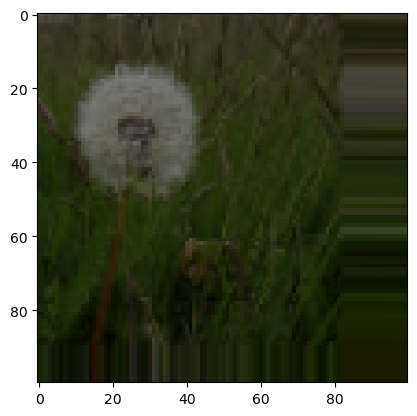

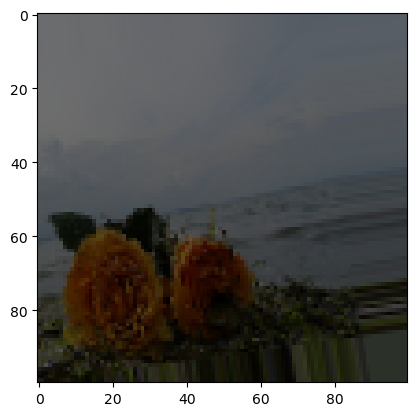

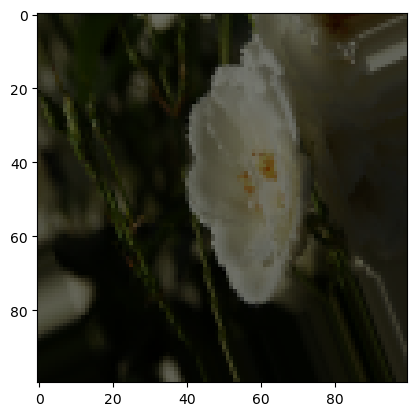

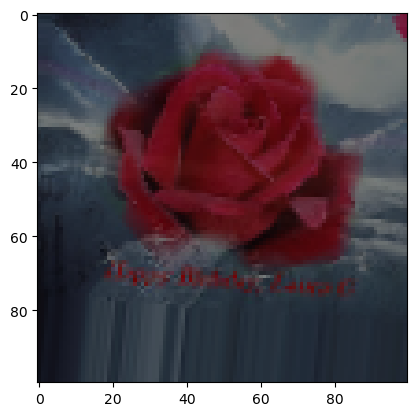

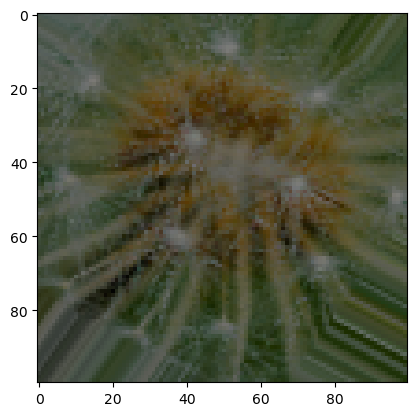

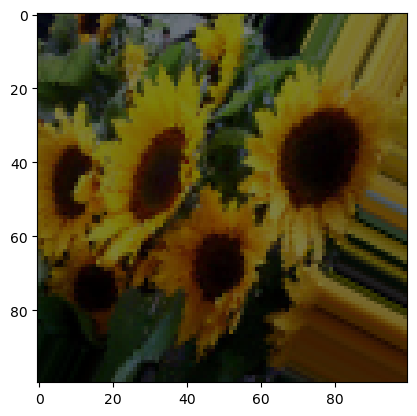

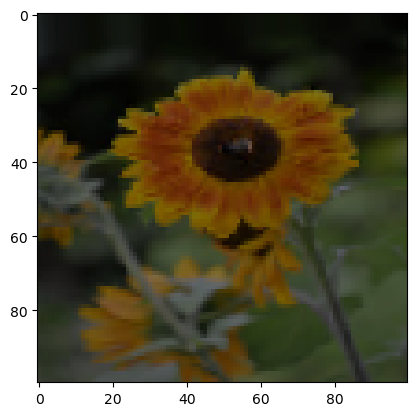

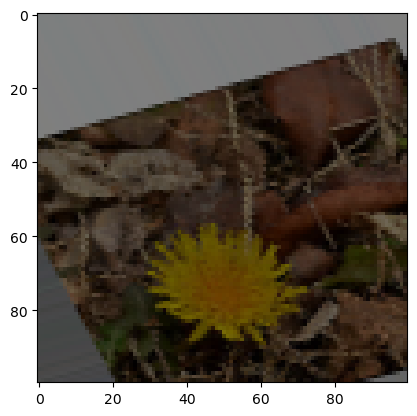

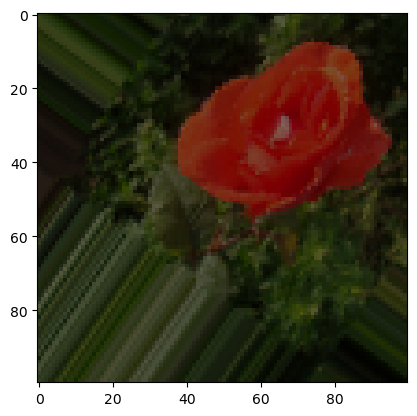

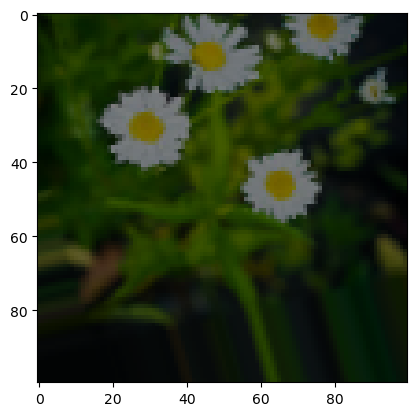

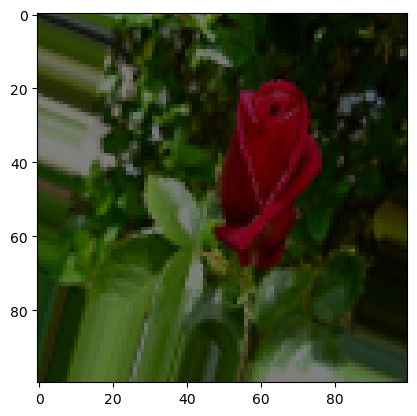

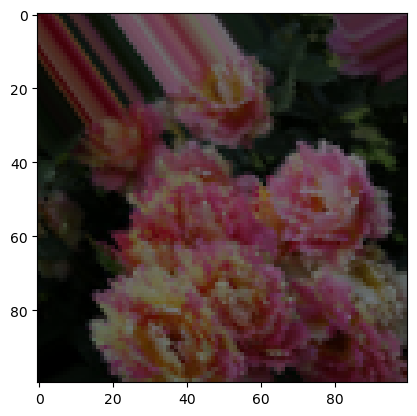

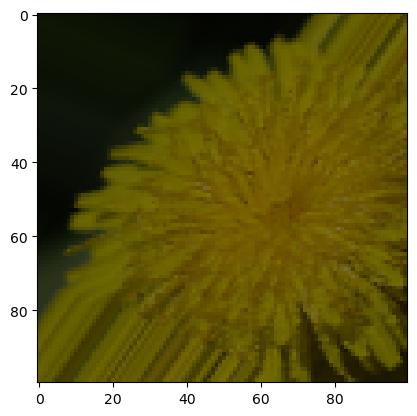

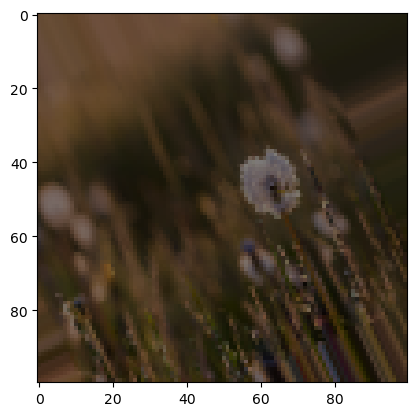

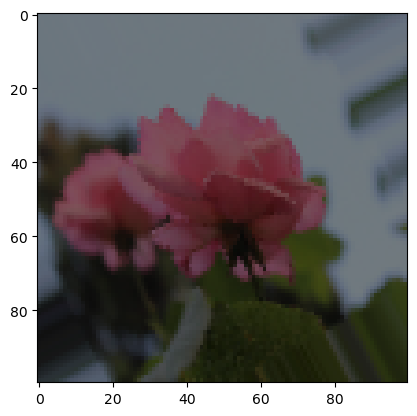

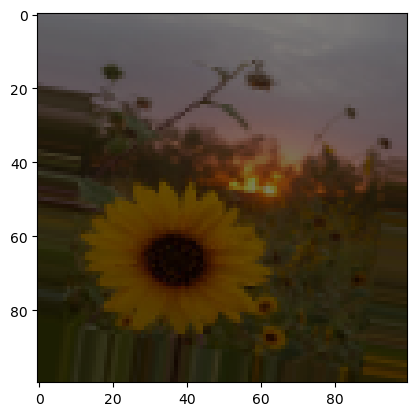

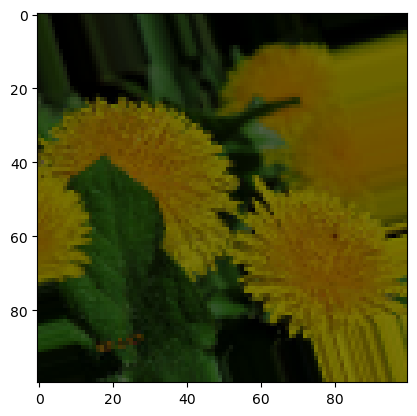

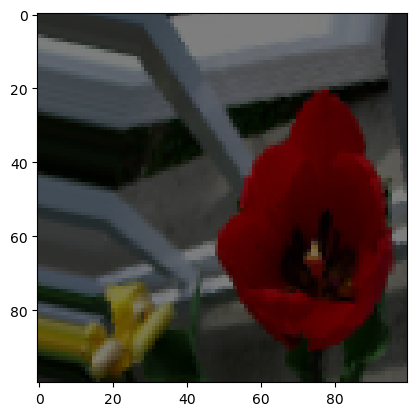

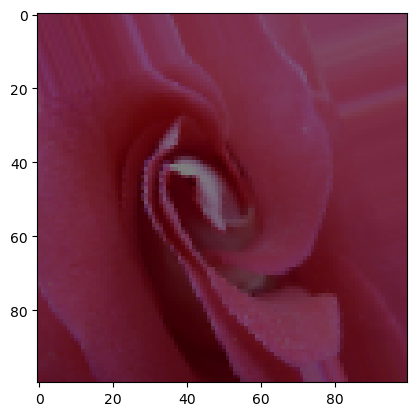

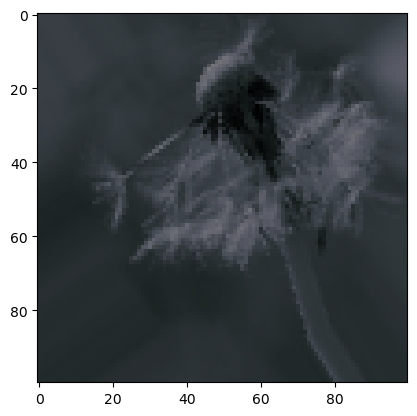

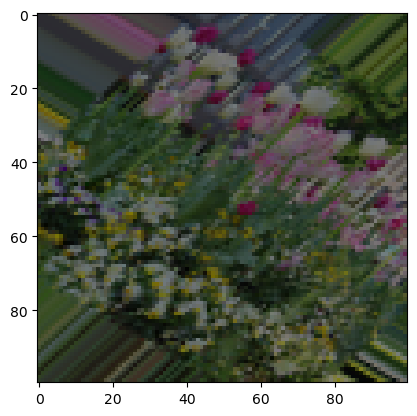

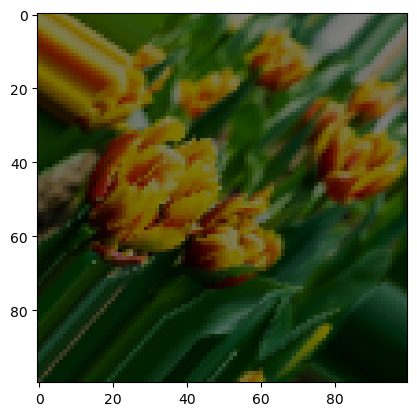

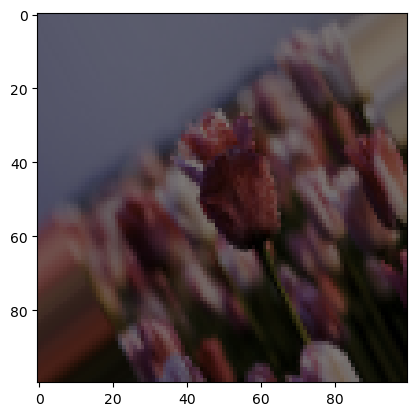

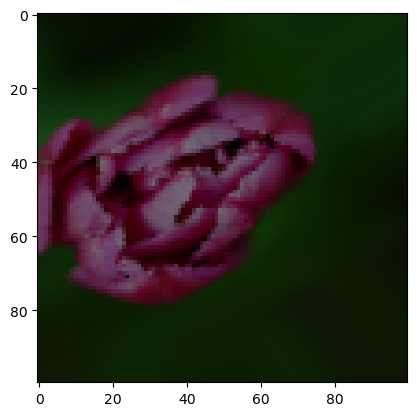

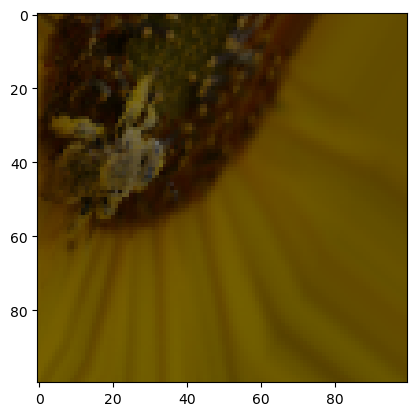

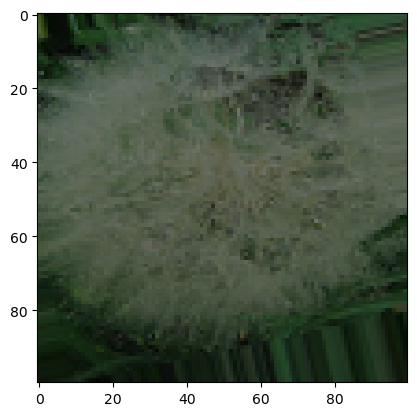

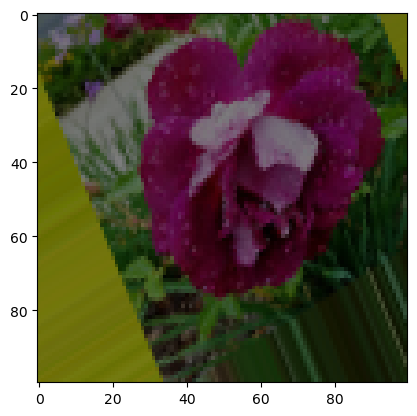

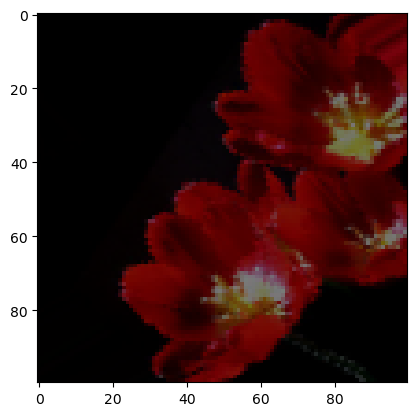

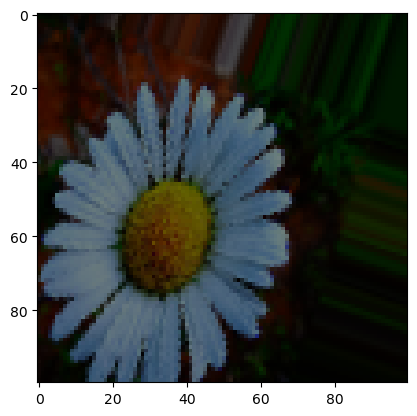

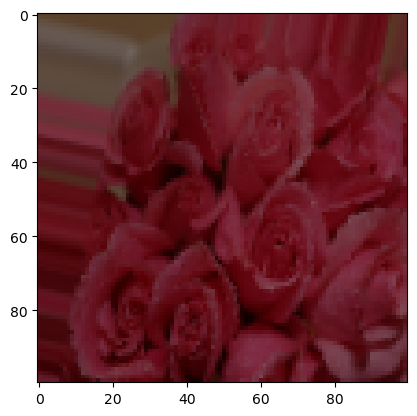

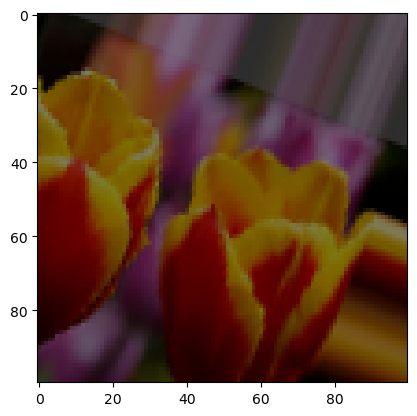

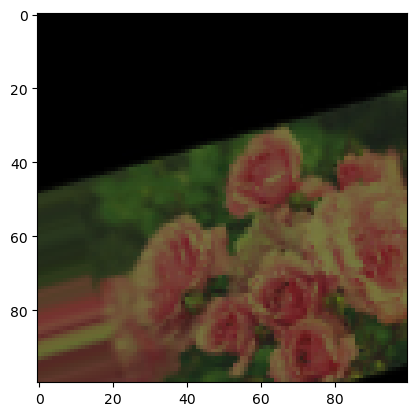

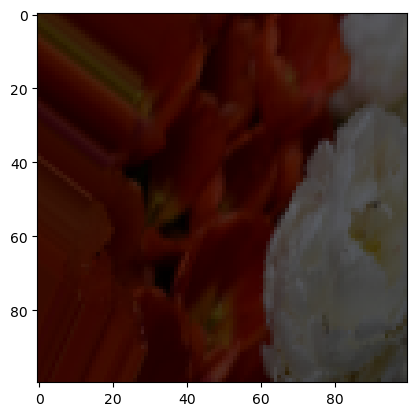

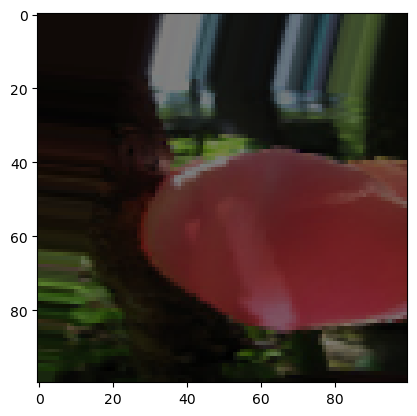

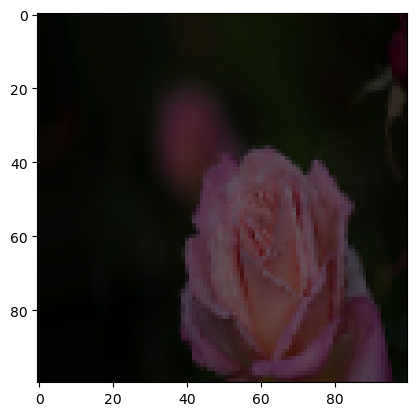

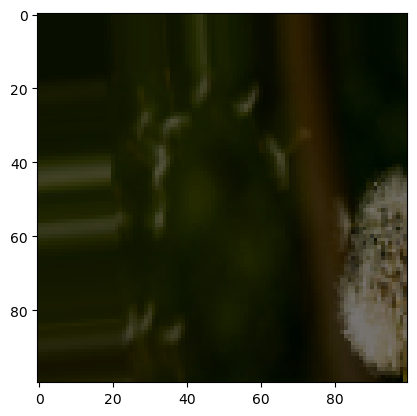

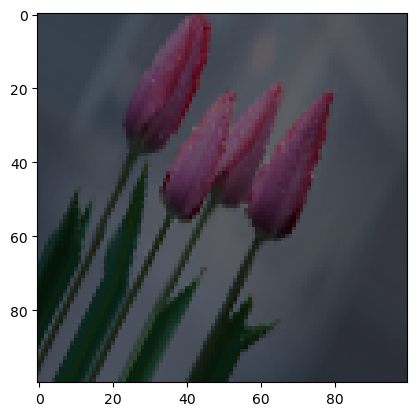

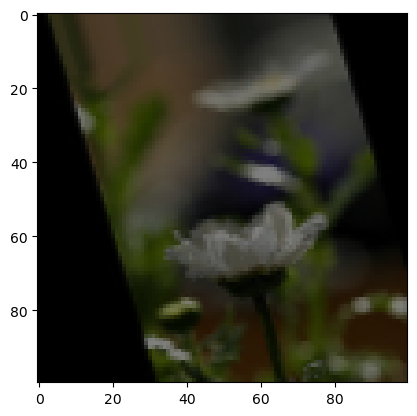

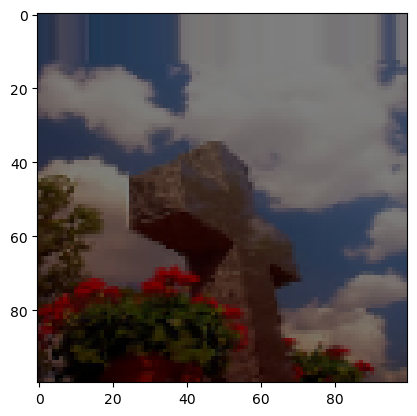

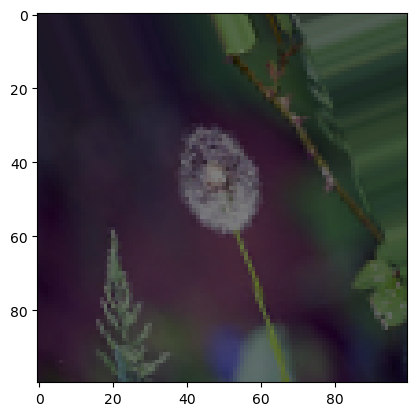

In [5]:
import numpy as np
import matplotlib.pyplot as plt 
# for initializing the break
i=0
for batch in data_gen.flow_from_directory('flowers', target_size=(100,100), batch_size=1):
    # to view image inline in jupiter
    image = batch [0].astype('uint8') # convet to unsigned integer
# changing the image from multi - image of 4D to single 3D
    image = np.squeeze (image)
   #plot raw pixel data
    plt.imshow(image)
    plt.show()

    i=i+1
    if i > 50 :
        break

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# defining the instance of ImageDataGenerator for both train and test class
train_datagen=ImageDataGenerator(
    rescale = 1
)
test_datagen=ImageDataGenerator(
    rescale = 1
)

# Defining the Model

In [10]:
import os
from PIL import Image

dataset_dir = "flowers"  # apna dataset folder ka path yahan likho
bad_images = []

# Walk through all folders
for root, dirs, files in os.walk(dataset_dir):
    for file in files:
        file_path = os.path.join(root, file)
        try:
            # Try to open image
            img = Image.open(file_path)
            img.verify()  # verify image
        except Exception as e:
            print("Corrupted image found:", file_path)
            bad_images.append(file_path)
            # Delete corrupted file
            os.remove(file_path)

print(f"\n✅ D")


✅ D


In [11]:
# defining the sequential model for multi-class classification
from tensorflow.keras.models import Sequential

model = Sequential()

In [15]:
from tensorflow.keras import layers, models

model = models.Sequential([
    # input layer
    layers.Input(shape=(100, 100, 3)),  
   
    # first convo layer 
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
   
    # second convo layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
   
    # third convo layer
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # flatten the layer
    layers.Flatten(),

    # denser layer
    layers.Dense(512, activation='relu'),

    layers.Dense(training_iterator.num_classes, activation='softmax')
])

# Iterators

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator for training & testing
train_datagen = ImageDataGenerator(rescale=1./255)   # training ke liye
test_datagen = ImageDataGenerator(rescale=1./255)    # testing ke liye

# Training iterator
training_iterator = train_datagen.flow_from_directory(
    'flowers',
    target_size=(100, 100),
    batch_size=64,
    class_mode='categorical'
)

# Testing iterator
testing_iterator = test_datagen.flow_from_directory(
    'flowers',
    target_size=(100, 100),
    batch_size=64,
    class_mode='categorical'
)



Found 4316 images belonging to 2 classes.
Found 4316 images belonging to 2 classes.


# compile & fit the model

In [19]:
import tensorflow as tf

def process_image(file_path, label):
    try:
        img = tf.io.read_file(file_path)
        img = tf.image.decode_jpeg(img, channels=3)
        img = tf.image.resize(img, [100, 100]) / 255.0
        return img, label
    except:
        print("Bad image skipped:", file_path.numpy())
        return None

dataset = training_iterator
training_iterator = train_datagen.flow_from_directory(
    "flowers",
    target_size=(100, 100),
    batch_size=64,
    class_mode="categorical",
    subset="training",
    shuffle=True
)

validation_iterator = test_datagen.flow_from_directory(
    "flowers",
    target_size=(100, 100),
    batch_size=64,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(training_iterator,validation_data=testing_iterator,epochs=8)

Found 4316 images belonging to 2 classes.
Found 0 images belonging to 2 classes.
Epoch 1/8
68/68 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.7454 - loss: 0.5873 - val_accuracy: 0.7530 - val_loss: 0.5541
Epoch 2/8
68/68 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.7530 - loss: 0.5587 - val_accuracy: 0.7530 - val_loss: 0.5555
Epoch 3/8
68/68 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.7507 - loss: 0.5514 - val_accuracy: 0.7530 - val_loss: 0.5448
Epoch 4/8
68/68 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.7528 - loss: 0.5499 - val_accuracy: 0.7544 - val_loss: 0.5336
Epoch 5/8
68/68 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.7572 - loss: 0.5340 - val_accuracy: 0.7685 - val_loss: 0.5137
Epoch 6/8
68/68 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.7662 - loss: 0.5169 - val_accuracy: 0.7766 - val_loss: 0.4914
Epoch 7/8
68/68 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.7746 - loss: 0.4909 - val_accuracy: 0.7998 - val_loss: 0.4445
Epoch 8/8
68/68 ━━━━━━━━━━━━━━━━━━━━ 93s 1s

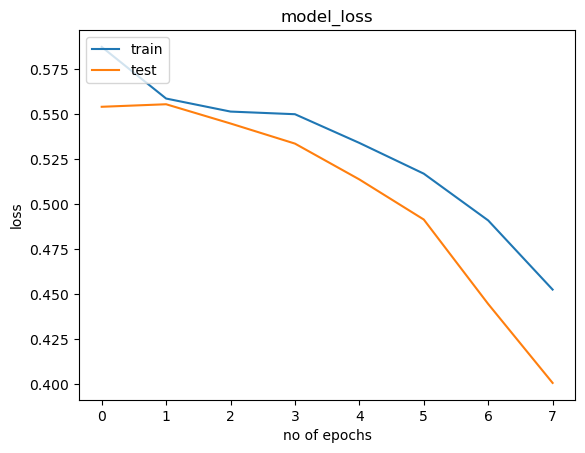

In [22]:
#plot loss vs epoch 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

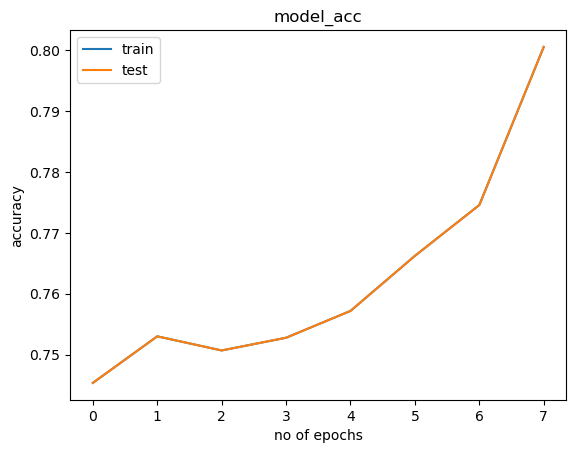

In [23]:
# plot accuracy vs epoch 
plt.plot(history.history['accuracy'])
plt.plot(history.history['accuracy'])
plt.title('model_acc')
plt.ylabel('accuracy')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()   #as approach is weak so our accuracy is reducing and loss increasing

# save the model 

In [26]:
model.save("flowers_model.h5")


In [25]:
# get class labels from iterators 
class_labels= training_iterator.class_indices
print(class_labels)

{'Test': 0, 'Train': 1}
